# Problem Set 2 Question 1

## Author Songrun He
### Problem 1

In [3]:
import numpy as np
import sympy as sy
import math
from math import pi
from matplotlib import pyplot as plt

In [4]:
# Define the function
x = sy.symbols('x')
f_x = (sy.sin(x)+1) ** (sy.sin(sy.cos(x)))

# Calculate the symbolic derivative
ff = lambda x: f_x.diff(x)
print('Derivative of the function')
ff(x)

Derivative of the function


(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [5]:
# Lambdify the function.
f_x_l = sy.lambdify(x, f_x, 'numpy')
ff_l = sy.lambdify(x, ff(x), 'numpy')

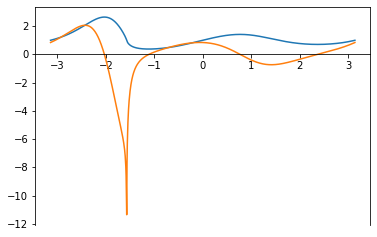

In [6]:
# Crate an Numpy array and plot f and f'
xarr = np.linspace(-pi, pi, 1000)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(xarr, f_x_l(xarr))
plt.plot(xarr, ff_l(xarr))
plt.show()

### Problem 2

In [7]:
# Write a function for each of the finite difference quotients listed in table 8.1
def forward1(f, x, h = 0.01):
    # Forward (Order:1)
    return np.array(list(map(lambda x:(f(x+h) - f(x))/h,x)))

In [8]:
def forward2(f, x, h = 0.01):
    # Forward (Order:2)
    return np.array(list(map(lambda x:(-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h),x)))

In [9]:
def backward1(f, x, h = 0.01):
    # Backward (Order:1)
    return np.array(list(map(lambda x:(f(x)-f(x-h))/h,x)))

In [10]:
def backward2(f, x, h = 0.01):
    # Backward (Order:2)
    return np.array(list(map(lambda x:(3*f(x)-4*f(x-h)+f(x-2*h))/(2*h),x)))

In [11]:
def centered2(f,x,h = 0.01):
    # Centered (Order:2)
    return np.array(list(map(lambda x:(f(x+h)-f(x-h))/(2*h),x)))

In [12]:
def centered4(f,x,h = 0.01):
    # Centered (Order:4)
    return np.array(list(map(lambda x:(f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h),x)))

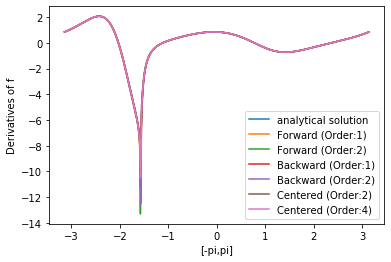

In [13]:
plt.plot(xarr, ff_l(xarr), label = 'analytical solution')
plt.plot(xarr, forward1(f_x_l, xarr), label = 'Forward (Order:1)')
plt.plot(xarr, forward2(f_x_l, xarr), label = 'Forward (Order:2)')
plt.plot(xarr, backward1(f_x_l, xarr), label = 'Backward (Order:1)')
plt.plot(xarr, backward2(f_x_l, xarr), label = 'Backward (Order:2)')
plt.plot(xarr, centered2(f_x_l, xarr), label = 'Centered (Order:2)')
plt.plot(xarr, centered4(f_x_l, xarr), label = 'Centered (Order:4)')
plt.legend()
plt.xlabel('[-pi,pi]')
plt.ylabel('Derivatives of f')
plt.show()

### Problem 3

In [14]:
def err_comput(x):
    x0 = ff_l(x)
    # Create the log space for calculating approximation error
    l_sp = np.logspace(-8, 0, 9)
    # Plot the absolute value of error and show the speed of convergence of different numerical methods
    plt.plot(l_sp, abs([forward1(f_x_l, [x], h = i) for i in l_sp] - x0), label = 'Forward (Order:1)', marker = 'o')
    plt.plot(l_sp, abs([forward2(f_x_l, [x], h = i) for i in l_sp] - x0), label = 'Forward (Order:2)', marker = 'o')
    plt.plot(l_sp, abs([backward1(f_x_l, [x], h = i) for i in l_sp] - x0), label = 'Backward (Order:1)', marker = 'o')
    plt.plot(l_sp, abs([backward2(f_x_l, [x], h = i) for i in l_sp] - x0), label = 'Backward (Order:2)', marker = 'o')
    plt.plot(l_sp, abs([centered2(f_x_l, [x], h = i) for i in l_sp] - x0), label = 'Centered (Order:2)', marker = 'o')
    plt.plot(l_sp, abs([centered4(f_x_l, [x], h = i) for i in l_sp] - x0), label = 'Centered (Order:4)', marker = 'o')
    plt.legend(loc = 'upper left')
    plt.ylabel('Absolute Error')
    plt.xlabel('h')
    plt.loglog()
    plt.show()

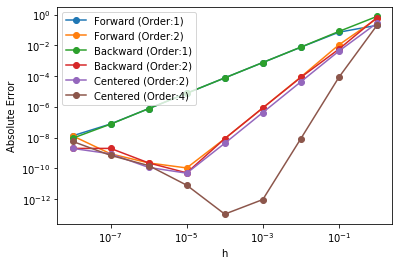

In [15]:
err_comput(1)


### Problem 4

In [16]:
# Load in the data
data = np.load('plane.npy')
data

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

In [17]:
# Convert the degree to radians
alpha=np.deg2rad(data[:,1])
beta=np.deg2rad(data[:,2])

In [18]:
# Calculate the Cartesian coordinates x(t) and y(t)
x = (500*np.tan(beta))/(np.tan(beta)-np.tan(alpha))
y = (500*np.tan(beta)*np.tan(alpha))/(np.tan(beta)-np.tan(alpha))

In [19]:
x, y

(array([1311.2713366 , 1355.9364762 , 1401.91839832, 1450.49700629,
        1498.64035029, 1543.79895461, 1598.04138183, 1647.59609291]),
 array([1962.45623878, 1975.11450516, 1987.34601606, 2000.84071299,
        2013.51241079, 2025.7922335 , 2040.99058265, 2055.06557068]))

In [20]:
# Calculate the numerical approximation to spped
# Pay attention to beginning and ending
speed=[[7,math.sqrt((x[1]-x[0])**2+(y[1]-y[0])**2)]]
for i in range(1,7):
    speed.append([7+i,math.sqrt(((x[i+1]-x[i-1])/2)**2+((y[i+1]-y[i-1])/2)**2)])
speed.append([14,math.sqrt((x[7]-x[6])**2+(y[7]-y[6])**2)])
speed

[[7, 46.42420062213374],
 [8, 47.001039380953344],
 [9, 48.99880514036797],
 [10, 50.09944162965227],
 [11, 48.290350838204944],
 [12, 51.564559049272255],
 [13, 53.923033545053535],
 [14, 51.51480056963696]]

Above is the speed of the plane at different time

### Problem 5

In [21]:
# Define the function that compute the Jacobian matrix
def Jacob(f, x, h = 0.01):
    m = len(f)
    n = len(x)
    J = np.zeros((m,n))
    e = np.identity(n)
    for i in range(m):
        for j in range(n):
            J[i,j] = ((f[i](x+h*e[j])-f[i](x-h*e[j])))/(2*h)
    return J

In [22]:
# Run the Jacob to test function and compare results
def f1(x):
    return x[0]**2
def f2(x):
    return x[0]**3 - x[1]
Jacob([f1, f2], np.array([1,1]))

array([[ 2.    ,  0.    ],
       [ 3.0001, -1.    ]])

It is easy to verify that the Jacobian of the function at point (1,1) is in deed the value above.

### Problem 7

In [23]:
import time
from autograd import numpy as anp
from autograd import grad

np.random.seed(seed = 10)

In [24]:
g = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
dg = grad(g)

In [27]:
def time_exp(n):
    sym_t=[0]*n
    sym_e=[10**(-18)]*n
    diff_t=[0]*n
    diff_e=[0]*n
    auto_t=[0]*n
    auto_e=[0]*n
    x = sy.symbols('x')
    for i in range(n):
        # Running time for Sympy
        x_rnd = np.random.uniform(-pi, pi)
        t0 = time.time()
        ff_trial = lambda x: f_x.diff(x)
        ff_l_trial = sy.lambdify(x, ff_trial(x), 'numpy')
        y = ff_l_trial(x_rnd)
        t1 = time.time()
        sym_t[i] = t1 - t0
        
        # Running time for difference quotients
        t2 = time.time()
        y_diff = centered4(f_x_l, [x_rnd], 0.0001)
        t3 = time.time()
        diff_t[i] = t3 - t2
        diff_e[i] = abs(y_diff - y)
        
        # Running time for autograd
        t4 = time.time()
        y_auto = dg(x_rnd)
        t5 = time.time()
        auto_t[i] = t5 - t4
        auto_e[i] = abs(y_auto - y)
        
    #Plot the error and running time
    plt.loglog(sym_t,sym_e,'o',label='Sympy')
    plt.loglog(diff_t,diff_e,'o',label='Difference Quotients')
    plt.loglog(auto_t,auto_e,'o',label='Autograd')
    plt.xlabel('Computation Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.xlim(10**-5,10**-2)
    plt.ylim(10**-19,10**-10)
    plt.legend()
        
        

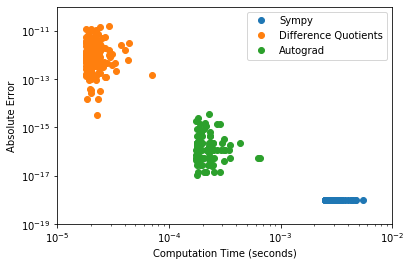

In [28]:
time_exp(200)